# Xgboost
Hyperparameter Optimization For Xgboost using RandomizedSearchCV

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


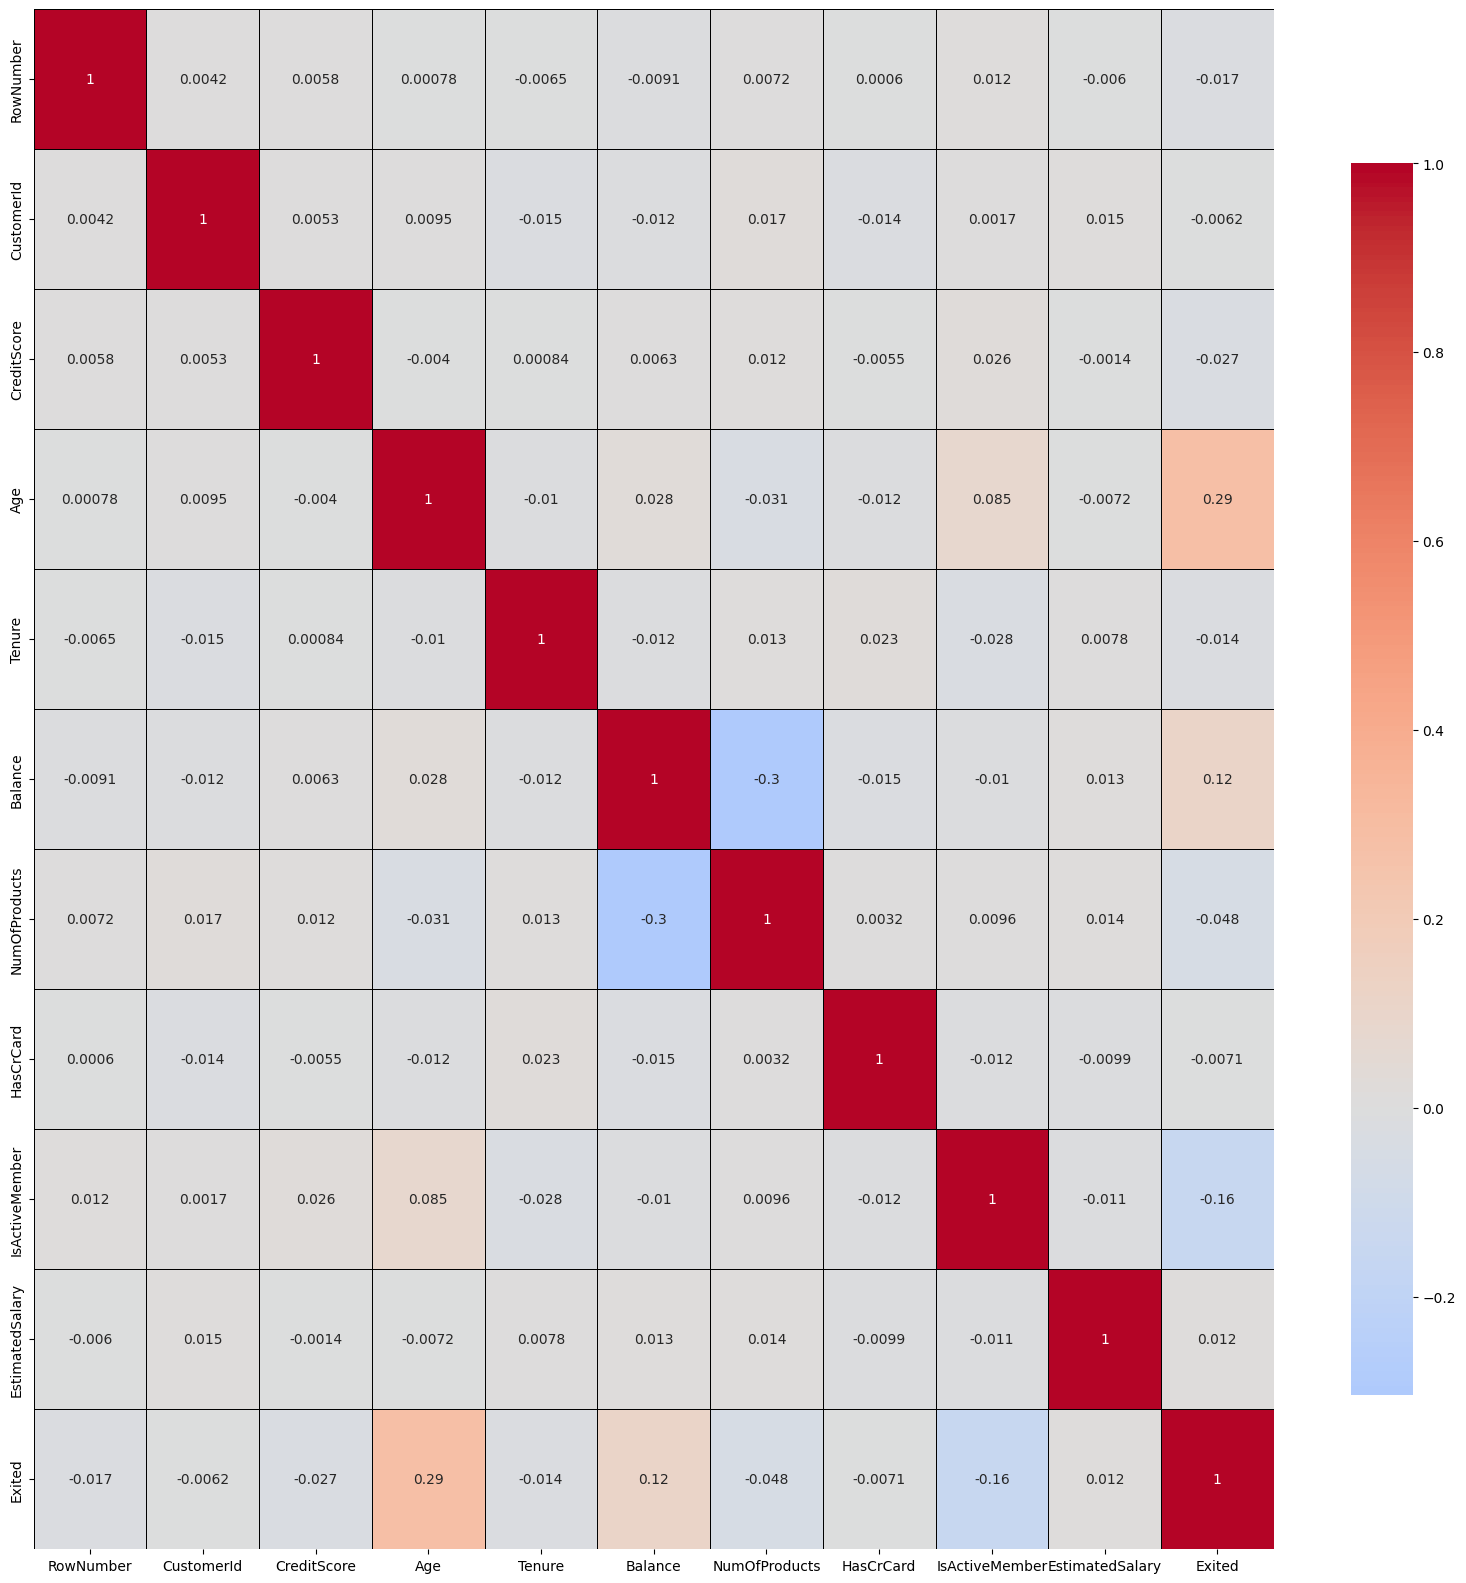

In [5]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
corrmat= numeric_df.corr()
top_corr_features= corrmat.index
plt.figure(figsize= (20,20))
#plot heat map
g = sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0, linewidths=0.5, linecolor='black', 
                annot_kws={"size": 10}, cbar_kws={'shrink': .8})

In [6]:
#Get the Independent and Dependent Features
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

In [9]:
geography= pd.get_dummies(X['Geography'], drop_first= True).astype(int)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [11]:
gender= pd.get_dummies(X['Gender'], drop_first= True).astype(int)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [12]:
X= X.drop(['Geography', 'Gender'], axis= 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
X= pd.concat([X, geography, gender], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [26]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

In [27]:
classifier=xgboost.XGBClassifier()

In [28]:
random_search= RandomizedSearchCV(classifier, param_distributions= params, n_iter=5, scoring='roc_auc', n_jobs= -1, cv=5, verbose=3)
random_search.fit(X, Y)
X.head()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [32]:
best_params = {
    'colsample_bytree': 0.3,
    'gamma': 0.3,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 3,
}
classifier = XGBClassifier(
    **best_params,                   # Unpack the optimized parameters
    n_estimators=100,                # Set a default value for n_estimators (e.g., 100)
    base_score=0.5,                  # Default base score
    booster='gbtree',                # Default booster (most common choice)
    random_state=42,                 # Ensures reproducibility
    eval_metric='logloss'            # You can choose a specific evaluation metric (logloss for binary classification)
)

In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

In [38]:
score

array([0.86 , 0.849, 0.869, 0.846, 0.857, 0.844, 0.867, 0.866, 0.849,
       0.848])

In [39]:
print(score.mean())

0.8555000000000001
